In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Phishing/UNB/Binary/Base_classifier_result(URL-HTML cross)(3).csv")
data

,labels,mlp_prediction_non,mlp_prediction_phish,nn_prediction_non,nn_prediction_phish,nn2_prediction_non,nn2_prediction_phish
0,0,1.000000,1.544168e-160,1.000000,1.544168e-160,1.000000,1.544168e-160
1,1,1.000000,7.870577e-28,1.000000,7.870577e-28,1.000000,7.870577e-28
2,0,0.998954,1.046389e-03,0.998954,1.046389e-03,0.998954,1.046389e-03
3,0,1.000000,7.799215e-293,1.000000,7.799215e-293,1.000000,7.799215e-293
4,1,0.041413,9.585872e-01,0.041413,9.585872e-01,0.041413,9.585872e-01
...,...,...,...,...,...,...,...
2933,1,0.043963,9.560372e-01,0.043963,9.560372e-01,0.043963,9.560372e-01
2934,0,1.000000,2.109332e-13,1.000000,2.109332e-13,1.000000,2.109332e-13
2935,0,1.000000,1.245218e-74,1.000000,1.245218e-74,1.000000,1.245218e-74
2936,0,1.000000,5.905458e-43,1.000000,5.905458e-43,1.000000,5.905458e-43


In [4]:
data.shape

(2938, 7)

In [5]:
data.columns

Index(['labels', 'mlp_prediction_non', 'mlp_prediction_phish',
       'nn_prediction_non', 'nn_prediction_phish', 'nn2_prediction_non',
       'nn2_prediction_phish'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   labels                2938 non-null   int64  
 1   mlp_prediction_non    2938 non-null   float64
 2   mlp_prediction_phish  2938 non-null   float64
 3   nn_prediction_non     2938 non-null   float64
 4   nn_prediction_phish   2938 non-null   float64
 5   nn2_prediction_non    2938 non-null   float64
 6   nn2_prediction_phish  2938 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 160.8 KB


In [7]:
import numpy as np


y = data['labels'].values
x = np.array(data.drop('labels',axis=1))


print(x.shape, y.shape)

(2938, 6) (2938,)


In [8]:

import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_aa(x_train, x_val, y_train, y_val, opt, early_stopping_monitor):

  n_cols = x_train.shape[1]
  #create model
  model = Sequential()
  model.add(Dense(5, input_dim=6, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  #compile model using mse as a measure of model performance
  model.compile(optimizer = opt, loss= 'binary_crossentropy', metrics=["accuracy"])

  history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping_monitor])


  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
  plt.show()


  print('Validation Accuracy: ')
  # Predicting the Test set results
  y_pred = model.predict(x_val)
  y_pred = (y_pred > 0.5)


  print(classification_report(y_val, y_pred))

  # Model Accuracy, how often is the classifier correct?
  print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

  # Creating the Confusion Matrix
  cm = confusion_matrix(y_val, y_pred)
  cm
  tn, fp, fn, tp = confusion_matrix(list(y_val), list(y_pred), labels=[0, 1]).ravel()

  print('True Positive', tp)
  print('True Negative', tn)
  print('False Positive', fp)
  print('False Negative', fn)

  print('Precision: %.4f' % precision_score(y_val, y_pred))
  print('Recall: %.4f' % recall_score(y_val, y_pred))
  print('F1 Score: %.4f' % f1_score(y_val, y_pred))

  return metrics.accuracy_score(y_val, y_pred)



Epoch 1/100
83/83 [==============================] - 1s 5ms/step - loss: 0.5647 - accuracy: 0.8952 - val_loss: 0.5324 - val_accuracy: 0.8980
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.8994 - val_loss: 0.4751 - val_accuracy: 0.8946
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8983 - val_loss: 0.4308 - val_accuracy: 0.8946
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8983 - val_loss: 0.3996 - val_accuracy: 0.8946
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3645 - accuracy: 0.8983 - val_loss: 0.3789 - val_accuracy: 0.8946
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8983 - val_loss: 0.3658 - val_accuracy: 0.8946
Epoch 7/100
83/83 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8979 - val_loss: 0.3573 - val_accuracy: 0.8946
Epoch 8/100
8

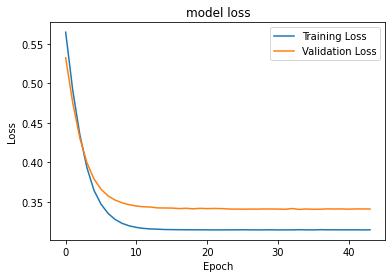

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       214
           1       0.96      0.65      0.78        80

    accuracy                           0.90       294
   macro avg       0.92      0.82      0.86       294
weighted avg       0.91      0.90      0.89       294

Accuracy: 0.8979591836734694
True Positive 52
True Negative 212
False Positive 2
False Negative 28
Precision: 0.9630
Recall: 0.6500
F1 Score: 0.7761
Epoch 1/100
83/83 [==============================] - 1s 3ms/step - loss: 0.7366 - accuracy: 0.5511 - val_loss: 0.5098 - val_accuracy: 0.8810
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4392 - accuracy: 0.9005 - val_loss: 0.4139 - val_accuracy: 0.8844
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3784 - accuracy: 0.8994 - val_loss: 0.3790 - val_accuracy: 0.8844
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3490

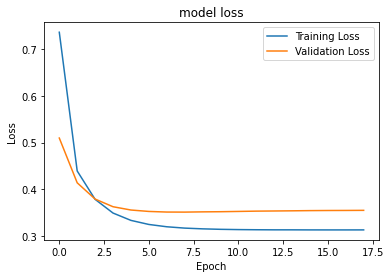

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       238
           1       0.79      0.54      0.64        56

    accuracy                           0.88       294
   macro avg       0.84      0.75      0.78       294
weighted avg       0.88      0.88      0.88       294

Accuracy: 0.8843537414965986
True Positive 30
True Negative 230
False Positive 8
False Negative 26
Precision: 0.7895
Recall: 0.5357
F1 Score: 0.6383
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4156 - accuracy: 0.8627 - val_loss: 0.3986 - val_accuracy: 0.8946
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3605 - accuracy: 0.8975 - val_loss: 0.3691 - val_accuracy: 0.9014
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8979 - val_loss: 0.3523 - val_accuracy: 0.8980
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3298

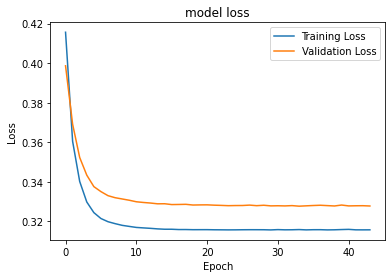

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       217
           1       0.90      0.68      0.77        77

    accuracy                           0.89       294
   macro avg       0.90      0.82      0.85       294
weighted avg       0.89      0.89      0.89       294

Accuracy: 0.8945578231292517
True Positive 52
True Negative 211
False Positive 6
False Negative 25
Precision: 0.8966
Recall: 0.6753
F1 Score: 0.7704
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.7078 - accuracy: 0.7700 - val_loss: 0.6455 - val_accuracy: 0.7721
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6143 - accuracy: 0.8468 - val_loss: 0.5901 - val_accuracy: 0.8844
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.8994 - val_loss: 0.5535 - val_accuracy: 0.8810
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5327

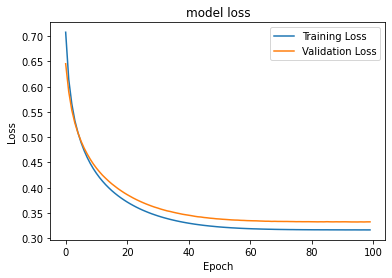

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       227
           1       0.80      0.61      0.69        67

    accuracy                           0.88       294
   macro avg       0.85      0.78      0.81       294
weighted avg       0.87      0.88      0.87       294

Accuracy: 0.8775510204081632
True Positive 41
True Negative 217
False Positive 10
False Negative 26
Precision: 0.8039
Recall: 0.6119
F1 Score: 0.6949
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.8687 - accuracy: 0.2277 - val_loss: 0.6854 - val_accuracy: 0.2483
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.6428 - accuracy: 0.6123 - val_loss: 0.6035 - val_accuracy: 0.8741
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5813 - accuracy: 0.8835 - val_loss: 0.5608 - val_accuracy: 0.8810
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.545

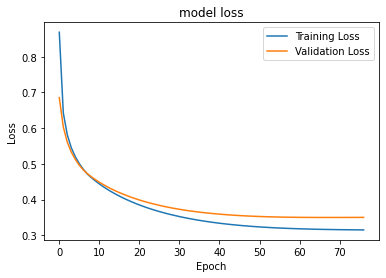

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       221
           1       0.90      0.60      0.72        73

    accuracy                           0.88       294
   macro avg       0.89      0.79      0.82       294
weighted avg       0.89      0.88      0.88       294

Accuracy: 0.8843537414965986
True Positive 44
True Negative 216
False Positive 5
False Negative 29
Precision: 0.8980
Recall: 0.6027
F1 Score: 0.7213
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4661 - accuracy: 0.8865 - val_loss: 0.3966 - val_accuracy: 0.8912
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.9002 - val_loss: 0.3564 - val_accuracy: 0.8844
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8990 - val_loss: 0.3443 - val_accuracy: 0.8878
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3247

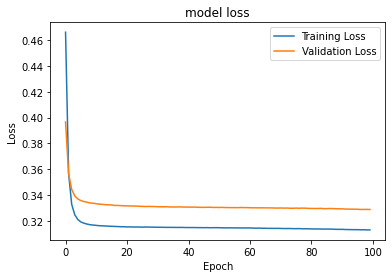

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       219
           1       0.86      0.67      0.75        75

    accuracy                           0.89       294
   macro avg       0.88      0.82      0.84       294
weighted avg       0.89      0.89      0.88       294

Accuracy: 0.8877551020408163
True Positive 50
True Negative 211
False Positive 8
False Negative 25
Precision: 0.8621
Recall: 0.6667
F1 Score: 0.7519
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6522 - accuracy: 0.8729 - val_loss: 0.6124 - val_accuracy: 0.9184
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5933 - accuracy: 0.8941 - val_loss: 0.5673 - val_accuracy: 0.9184
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5561 - accuracy: 0.8933 - val_loss: 0.5341 - val_accuracy: 0.9184
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5282

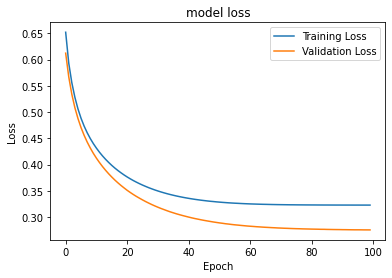

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       235
           1       0.89      0.69      0.78        59

    accuracy                           0.92       294
   macro avg       0.91      0.84      0.87       294
weighted avg       0.92      0.92      0.92       294

Accuracy: 0.9217687074829932
True Positive 41
True Negative 230
False Positive 5
False Negative 18
Precision: 0.8913
Recall: 0.6949
F1 Score: 0.7810
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.5074 - accuracy: 0.7084 - val_loss: 0.4543 - val_accuracy: 0.7551
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8427 - val_loss: 0.4421 - val_accuracy: 0.8537
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8998 - val_loss: 0.4350 - val_accuracy: 0.8571
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3523

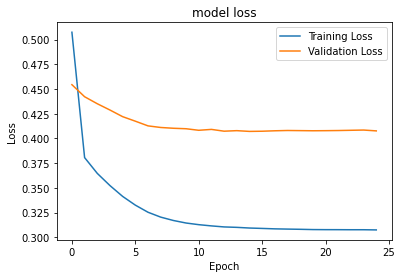

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       222
           1       0.82      0.51      0.63        72

    accuracy                           0.85       294
   macro avg       0.84      0.74      0.77       294
weighted avg       0.85      0.85      0.84       294

Accuracy: 0.8537414965986394
True Positive 37
True Negative 214
False Positive 8
False Negative 35
Precision: 0.8222
Recall: 0.5139
F1 Score: 0.6325
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.4999 - accuracy: 0.7822 - val_loss: 0.3333 - val_accuracy: 0.9215
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8957 - val_loss: 0.2900 - val_accuracy: 0.9181
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8957 - val_loss: 0.2798 - val_accuracy: 0.9181
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.3234

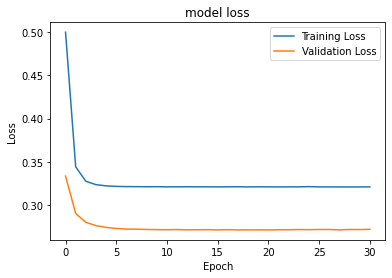

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       236
           1       0.92      0.63      0.75        57

    accuracy                           0.92       293
   macro avg       0.92      0.81      0.85       293
weighted avg       0.92      0.92      0.91       293

Accuracy: 0.9180887372013652
True Positive 36
True Negative 233
False Positive 3
False Negative 21
Precision: 0.9231
Recall: 0.6316
F1 Score: 0.7500
Epoch 1/100
83/83 [==============================] - 1s 4ms/step - loss: 0.6721 - accuracy: 0.6076 - val_loss: 0.4846 - val_accuracy: 0.7986
Epoch 2/100
83/83 [==============================] - 0s 3ms/step - loss: 0.4723 - accuracy: 0.7671 - val_loss: 0.3752 - val_accuracy: 0.7986
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.7671 - val_loss: 0.3375 - val_accuracy: 0.7986
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4111

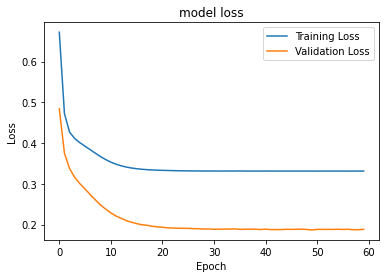

Validation Accuracy: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       234
           1       0.96      0.83      0.89        59

    accuracy                           0.96       293
   macro avg       0.96      0.91      0.93       293
weighted avg       0.96      0.96      0.96       293

Accuracy: 0.9590443686006825
True Positive 49
True Negative 232
False Positive 2
False Negative 10
Precision: 0.9608
Recall: 0.8305
F1 Score: 0.8909
Average Validation Accuracy: 0.8979173922128579


In [9]:
from sklearn.model_selection import KFold
import tensorflow as tf

optimizer1=tf.keras.optimizers.Adam(learning_rate=0.0005)


from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=10)
n_split = 10
acc = 0

kf = KFold(n_split, random_state=10, shuffle=True)
for train, val in kf.split(x, y):
  val_acc = model_aa(x[train], x[val], y[train], y[val], optimizer1, early_stopping_monitor)
  acc = acc + val_acc

print("Average Validation Accuracy:",acc/n_split)

